#Importazione Librerie

In [71]:
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
import seaborn as sns
import nltk
import string

# Importazione Dataset


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df_fake = pd.read_csv("/content/drive/MyDrive/FakeNewsDetection/Dataset/Fake.csv")
df_true = pd.read_csv("/content/drive/MyDrive/FakeNewsDetection/Dataset/True.csv")

In [9]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


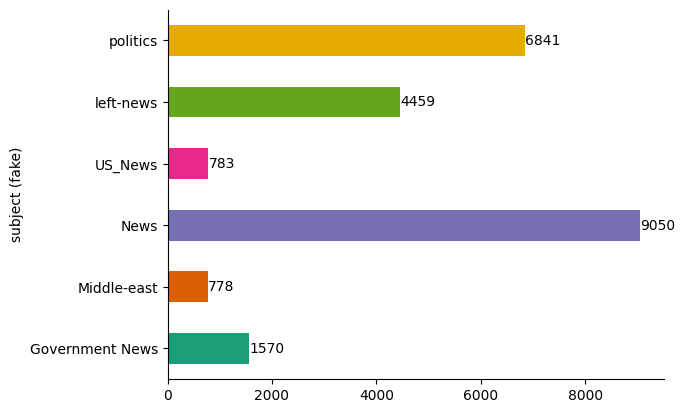

In [28]:
# Più che per curiosità che per utilità: non ci serviranno le "categorie"

fake = df_fake.groupby('subject').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# rende invisibili le linee sopra e a destra del grafico
plt.gca().spines[['top', 'right',]].set_visible(False)
fake.set_ylabel('subject (fake)')

# Aggiungere il numerino esatto sopra ciascuna barra
for i, v in enumerate(df_fake.groupby('subject').size()):
    fake.text(v + 0.1, i, str(v), ha='left', va='center')

In [18]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


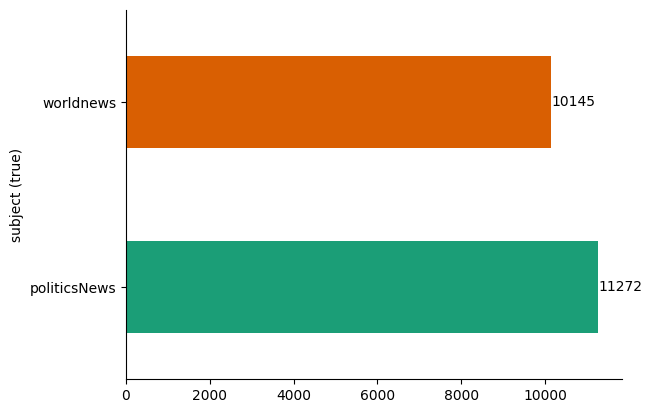

In [29]:
true = df_true.groupby('subject').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
true.set_ylabel('subject (true)')  # Cambia il nome dell'asse y

# Aggiungere il numerino esatto sopra ciascuna barra
for i, v in enumerate(df_true.groupby('subject').size()):
    true.text(v + 0.1, i, str(v), ha='left', va='center')


### Inserimento di una colonna "class" come feature

In [30]:
df_fake["class"] = 0
df_true["class"] = 1

Dimensioni Dataset


In [31]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

##Unione dei due dataset Fake e True

In [34]:
df = pd.concat([df_fake, df_true], axis =0 )
df.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


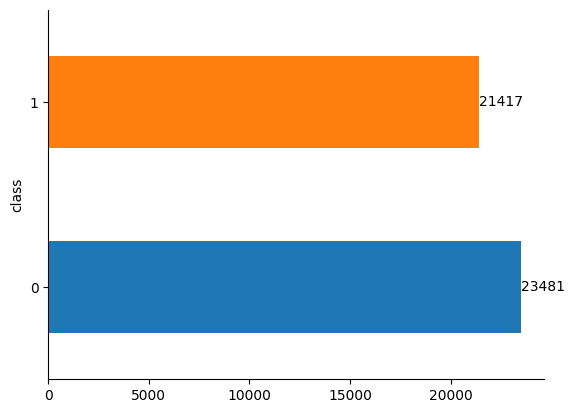

In [50]:
merge = df.groupby('class').size().plot(kind='barh', color=plt.cm.tab10.colors)
plt.gca().spines[['top', 'right',]].set_visible(False)
merge.set_ylabel('class')  # Cambia il nome dell'asse y

# Aggiungere il numerino esatto sopra ciascuna barra
for i, v in enumerate(df.groupby('class').size()):
    merge.text(v + 0.1, i, str(v), ha='left', va='center')


##Rimozione delle colonne che non ci servono

In [51]:
df = df.drop(["title", "subject","date"], axis = 1)

In [55]:
df.columns

Index(['text', 'class'], dtype='object')

##Permutazione delle righe del DataFrame

In [56]:
df = df.sample(frac = 1)

In [57]:
df.head()

,text,class
14078,ANKARA (Reuters) - Iran s Revolutionary Guards...,1
13219,VALLETTA (Reuters) - Maltese police have arres...,1
3001,"It s apparently a new world, one in which it s...",0
19033,,0
19345,LONDON (Reuters) - An 18-year-old man who came...,1


In [63]:
# Questa istruzione reimposta l'indice del DataFrame.
# I vecchi indici verranno salvati come colonna nel
# DataFrame con il nome "index". Il nuovo DataFrame avrà un nuovo indice
# numerico a partire da zero.
df.reset_index(inplace = True)

# Questa istruzione elimina la colonna "index" dal DataFrame.
df.drop(["index"], axis = 1, inplace = True)

In [60]:
df.head()

,text,class
0,ANKARA (Reuters) - Iran s Revolutionary Guards...,1
1,VALLETTA (Reuters) - Maltese police have arres...,1
2,"It s apparently a new world, one in which it s...",0
3,,0
4,LONDON (Reuters) - An 18-year-old man who came...,1


Specifico il dato corretto che andrò ad utilizzare

In [64]:
df.dtypes

text     object
class     int64
dtype: object

In [65]:
df["class"] = df["class"].astype("category")
df["text"] = df["text"].astype(str)

In [66]:
df.dtypes

text       object
class    category
dtype: object

# Preprocessing
Possiamo ora passare al preprocessing dei dati testuali:

In [72]:
# Download delle stopwords e del wordnet corpus di nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Il wordnet corpus di NLTK è una raccolta di dati lessicali e semantiche utilizzata per il trattamento del linguaggio naturale. WordNet è un database lessicale ampiamente utilizzato che organizza le parole in modo gerarchico e presenta relazioni semantiche tra di esse.

In WordNet, le parole sono organizzate in "sinonimi sets" o "synsets", che raggruppano parole con significati simili. Ad esempio, il synset per il termine "car" può includere parole come "automobile", "auto", "macchina", ecc.

Il WordNet Corpus di NLTK, in sintesi, fornisce risorse lessicali e semantiche che possono essere utilizzate per svolgere diverse attività nell'ambito dell'elaborazione del linguaggio naturale, come l'analisi semantica, la traduzione automatica, la classificazione del testo, ecc.

In [73]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

## Conversione del testo in lowercase

In [75]:
df["text"]

0        ANKARA (Reuters) - Iran s Revolutionary Guards...
1        VALLETTA (Reuters) - Maltese police have arres...
2        It s apparently a new world, one in which it s...
3                                                         
4        LONDON (Reuters) - An 18-year-old man who came...
                               ...                        
44893    (Reuters) - The man accused of tackling U.S. S...
44894    We all remember the horrific violence that occ...
44895    There are so many reasons for this little cowa...
44896    All Donald Trump did is unload some play-doh f...
44897    WARSAW (Reuters) - Poland wants the euro zone ...
Name: text, Length: 44898, dtype: object

In [76]:
df['text'] = df['text'].str.lower()
df["text"].head()

0    ankara (reuters) - iran s revolutionary guards...
1    valletta (reuters) - maltese police have arres...
2    it s apparently a new world, one in which it s...
3                                                     
4    london (reuters) - an 18-year-old man who came...
Name: text, dtype: object

## Rimozione dei numeri

In [77]:
df['text'] = df['text'].str.replace('\d+', '')
df["text"].head()

<ipython-input-77-0911efded8c3>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\d+', '')


,text,class
0,ankara (reuters) - iran s revolutionary guards...,1
1,valletta (reuters) - maltese police have arres...,1
2,"it s apparently a new world, one in which it s...",0
3,,0
4,london (reuters) - an -year-old man who came t...,1


## Tokenizzazione

In [78]:
df['text'] = df['text'].apply(word_tokenize)
df["text"].head()

,text,class
0,"[ankara, (, reuters, ), -, iran, s, revolution...",1
1,"[valletta, (, reuters, ), -, maltese, police, ...",1
2,"[it, s, apparently, a, new, world, ,, one, in,...",0
3,[],0
4,"[london, (, reuters, ), -, an, -year-old, man,...",1


## Rimozione di Stopwords

In [79]:
df['text'] = df['text'].apply(lambda x: [item for item in x if item not in stop_words])
df["text"].head()

0    [ankara, (, reuters, ), -, iran, revolutionary...
1    [valletta, (, reuters, ), -, maltese, police, ...
2    [apparently, new, world, ,, one, perfectly, ac...
3                                                   []
4    [london, (, reuters, ), -, -year-old, man, cam...
Name: text, dtype: object

## Lemmatizzazione
Riconduce ogni singola parola alla sua forma canonica, ossia a quella che è la definizione all'interno del dizionario

In [80]:
df['text'] = df['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df["text"].head()

0    [ankara, (, reuters, ), -, iran, revolutionary...
1    [valletta, (, reuters, ), -, maltese, police, ...
2    [apparently, new, world, ,, one, perfectly, ac...
3                                                   []
4    [london, (, reuters, ), -, -year-old, man, cam...
Name: text, dtype: object

## Rimozione della punteggiatura

In [83]:
df['text'] = df['text'].apply(lambda x: [word for word in x if word not in string.punctuation])
df["text"].head()

0    [ankara, reuters, iran, revolutionary, guard, ...
1    [valletta, reuters, maltese, police, arrested,...
2    [apparently, new, world, one, perfectly, accep...
3                                                   []
4    [london, reuters, -year-old, man, came, britai...
Name: text, dtype: object

## Conversione del contenuto sottoforma di stringa

In [84]:
df['text'] = df['text'].apply(lambda x: ' '.join(x))
df.head()

,text,class
0,ankara reuters iran revolutionary guard ready ...,1
1,valletta reuters maltese police arrested suspe...,1
2,apparently new world one perfectly acceptable ...,0
3,,0
4,london reuters -year-old man came britain pare...,1


## Rimozione delle parole con meno di due caratteri

In [88]:
def remove_single_char_func(text, threshold=2):
    threshold = threshold

    words = word_tokenize(text)
    text = ' '.join([word for word in words if len(word) > threshold])
    return text

In [ ]:
df['text'] = df['text'].apply(remove_single_char_func)
df.head()